# Classification Problem Banknote-authentication 



In [0]:
#importing 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

banknote Dataset were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization,
an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels.
Due to the object lens and distance to the investigated object gray-scale pictures with a 
resolution of about 660 dpi were gained. A Wavelet Transform tool was used to extract features from these images.

our problem is we have 1372 instances of 2 different classes for (sample is banknote-sample isn't banknote): c1 and c2 so we have 4 features which are:
V1:variance of Wavelet Transformed image.
V2:skewness of Wavelet Transformed image.
V3: curtosis of Wavelet Transformed image.
V4: entropy of image.

And using them we are going to predict which class is each sample belong from (kama and rose) to based on Logistic reg, SVM and KNN.

In [0]:
#our target column is class

#reading data
df = pd.read_csv('banknote-authentication.csv')
df.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [0]:
# labels = df['species'].unique().tolist()
# mapping = dict( zip(labels,range(len(labels))) )
# df.replace({'species': mapping},inplace=True)

In [0]:
df.describe()

,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
V1       1372 non-null float64
V2       1372 non-null float64
V3       1372 non-null float64
V4       1372 non-null float64
Class    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


from the plotting we could conclude that we have two classes and class 1 which has more samples than class 2
in addition if we have a  high values for V1 or V2, then these samples will belong to class 1 and
very high values belong to c2.
if we have values between 8 - 20 for V3 feature then these samples will be c2

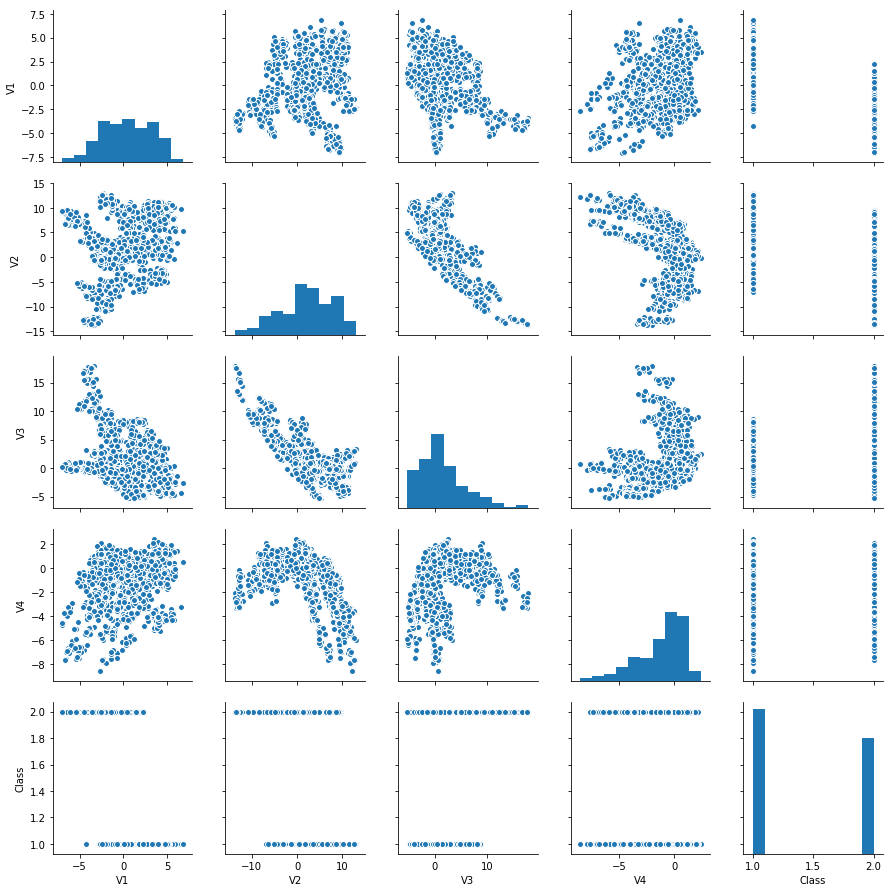

In [0]:
#data visualization
sns.pairplot(df)

C:\Users\Anas Badawi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


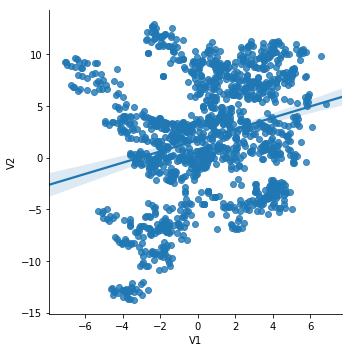

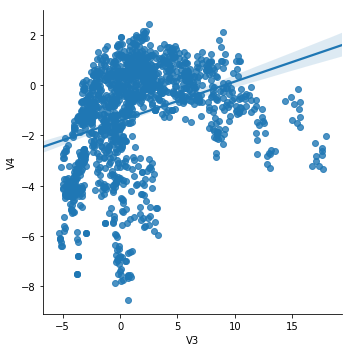

In [0]:
sns.lmplot(x='V1',y='V2',data=df)
sns.lmplot(x='V3',y='V4',data=df)

In [0]:
							
X = df[['V1','V2','V3','V4']]
y = df['Class']

In [0]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(solver='lbfgs',multi_class='multinomial').fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9878640776699029

In [0]:
#confussion metrix for logistic regression
from sklearn import metrics
metrics.confusion_matrix(y_test, pred)

array([[221,   4],
       [  1, 186]], dtype=int64)

In [0]:
#SVM
from sklearn import svm
clf2 = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf2.fit(X_train,y_train) 
pred2 = clf2.predict(X_test)
accuracy_score(y_test, pred2)

1.0

In [0]:
#confussion metrix for svm
metrics.confusion_matrix(y_test, pred2)

array([[225,   0],
       [  0, 187]], dtype=int64)

In [0]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train,y_train) 
pred3 = neigh.predict(X_test)
accuracy_score(y_test, pred3)

1.0

In [0]:
#confussion metrix for KNN
metrics.confusion_matrix(y_test, pred3)

array([[225,   0],
       [  0, 187]], dtype=int64)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [0]:
# 10-fold cross-validation with logistic regression
cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean()

0.9876071088543318

In [0]:
# 10-fold cross-validation with SVM
cross_val_score(clf2, X, y, cv=10, scoring='accuracy').mean()

1.0

In [0]:
# 10-fold cross-validation with knn
cross_val_score(neigh, X, y, cv=10, scoring='accuracy').mean()

0.9992700729927007

In [0]:
#for using ROC curves and AUC we have to binarize our classes
from sklearn.preprocessing import label_binarize
pred_bin = label_binarize(pred, classes=[1,2])
pred2_bin = label_binarize(pred2, classes=[1,2])
pred3_bin = label_binarize(pred3, classes=[1,2])
y_test_bin= label_binarize(y_test, classes=[1,2])

In [0]:
#ROC curves and AUC for logistic regression
metrics.roc_auc_score(y_test_bin, pred_bin)

0.9884373143196672

In [0]:
#ROC curves and AUC for SVM
metrics.roc_auc_score(y_test_bin, pred2_bin)

1.0

In [0]:
#ROC curves and AUC for KNN
metrics.roc_auc_score(y_test_bin, pred3_bin)

1.0

From Printing the coefficients along with the features they represent, we could conclude that the most feature that 
doesn't have a propotional with our target is "V1"

In [0]:
#Print the coefficients along with the features 
list(zip(X, clf.coef_))

[('V1', array([-1.70805452, -0.98412166, -1.18646856, -0.05953516]))]